<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/340_summarize_posterior.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(sintesi-distr-post-notebook)=
# Sintesi a posteriori

In questo capitolo, concentriamo la nostra attenzione sulla sintesi dell'informazione racchiusa nella distribuzione a posteriori, la quale rappresenta il nostro livello di incertezza riguardo al parametro o ai parametri incogniti oggetto dell'inferenza.

## Preparazione del Notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import arviz as az

In [ ]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Riepilogo numerico

La distribuzione a posteriori contiene in sé tutte le informazioni disponibili sui potenziali valori del parametro. Nel caso di un parametro unidimensionale o bidimensionale, possiamo rappresentare la distribuzione a posteriori mediante un grafico $p(\theta \mid y)$.

Tuttavia, quando ci troviamo di fronte a vettori di parametri con più di due dimensioni, risulta vantaggioso eseguire una sintesi numerica della distribuzione a posteriori. Possiamo distinguere due forme di sintesi numerica della distribuzione a posteriori:

- Stima puntuale;
- Intervallo di credibilità.

### Stima puntuale

Nel contesto dell'inferenza bayesiana, il processo di stima del valore più credibile del parametro $\theta$ tramite la distribuzione a posteriori è un compito cruciale. Comunemente, tale processo si avvale di tre statistiche: la moda, la mediana e la media, la cui scelta è guidata dalla forma della distribuzione a posteriori. Queste statistiche sono utilizzate per ottenere una stima puntuale della tendenza centrale della distribuzione a posteriori, che a sua volta fornisce il "valore più credibile" del parametro. Questo valore rappresenta la stima a cui attribuiamo il massimo grado di fiducia soggettiva, basandoci sui dati osservati e sulle nostre credenze a priori.

1. **Media a posteriori**:
   La media a posteriori è il valore atteso del parametro $\theta$, calcolato sulla base della distribuzione a posteriori. In termini matematici, nel caso continuo, è espressa dalla formula:

   $$ E(\theta | y) = \int_{-\infty}^{\infty} \theta \, p(\theta | y) \, d\theta. $$
   
2. **Moda (Massimo a posteriori, MAP)**:
   La moda identifica il valore più probabile del parametro, ovvero quello che massimizza la distribuzione a posteriori. Questo valore è noto come "massimo a posteriori" (MAP). La stima MAP inizia con il concetto di stima di massima verosimiglianza (MLE), che cerca il valore di $\theta$, denotato come $\hat{\theta}_{ML}$, che massimizza la funzione di verosimiglianza $L(\theta | y)$, come segue:

   $$ \hat{\theta}_{ML} = \arg \max_\theta L(\theta | y). $$

   Nell'inferenza bayesiana, $\theta$ è considerato come una variabile casuale, e si specifica una distribuzione a priori su $\theta$ per riflettere la nostra incertezza su $\theta$. Integrando la distribuzione a priori, otteniamo la formula per la stima MAP:

   $$ \hat{\theta}_{MAP} = \arg \max_\theta L(\theta | y)p(\theta). $$

   Questa formula evidenzia che la stima MAP corrisponde al valore che massimizza la densità a posteriori di $\theta$ dati $y$, che coincide con la moda della densità a posteriori.

3. **Mediana**:
   La mediana è il valore del parametro per cui il 50% della massa di probabilità a posteriori si distribuisce equamente a sinistra e a destra. È una misura robusta della tendenza centrale, particolarmente utile in presenza di distribuzioni asimmetriche o multimodali, dove la moda potrebbe non fornire una stima accurata del valore più probabile del parametro.

Per valutare l'incertezza associata al parametro $\theta$, è utile calcolare la varianza a posteriori. Questa varianza è basata sulla tendenza centrale definita dalla media a posteriori, e la sua radice quadrata fornisce la deviazione standard a posteriori, che misura l'incertezza a posteriori relativa a $\theta$, espressa nelle stesse unità di misura dei dati. La formula per la varianza a posteriori è data da:

$$ V(\theta|y) = E[((\theta - E[(\theta|y)])^2 |y) = \int_{-\infty}^{\infty} (\theta - E[\theta | y])^2 p(\theta | y) d\theta = E[\theta^2 |y] - E[\theta|y]^2. $$

In sintesi, la media, la moda e la mediana a posteriori, insieme alla varianza a posteriori, forniscono una descrizione comprensiva del comportamento della distribuzione a posteriori di $\theta$, permettendoci di derivare stime puntuali e misurare l'incertezza associata a $\theta$ in modo informativo.

### Intervallo di credibilità

Nel contesto dell'inferenza bayesiana, l'intervallo di credibilità è uno strumento fondamentale per valutare l'ampiezza dell'intervallo che racchiude una determinata percentuale della massa della distribuzione a posteriori del parametro $\theta$. Questo intervallo fornisce informazioni sulla nostra incertezza relativa al valore del parametro: un intervallo più ampio indica una maggiore incertezza associata. L'obiettivo primario dell'intervallo di credibilità è di fornire una misura quantitativa dell'incertezza legata alla stima del parametro $\theta$.

La definizione di intervallo di credibilità non determina un unico intervallo di ordine $(1 - \alpha) \cdot 100\%$, ma rende possibile una gamma infinita di tali intervalli. Di conseguenza, è essenziale introdurre condizioni aggiuntive per la selezione dell'intervallo di credibilità. Due delle condizioni aggiuntive più comuni sono l'intervallo di credibilità simmetrico e l'intervallo di credibilità più stretto.

1. **Intervallo di Credibilità Simmetrico**:
   Questa condizione richiede che l'intervallo di credibilità sia simmetrico rispetto al punto di stima puntuale. Se $\hat{\theta}$ è il valore stimato del parametro, l'intervallo di credibilità avrà la forma $(\hat{\theta} - a, \hat{\theta} + a)$, dove $a$ è un valore positivo adeguato. Un intervallo di credibilità simmetrico al livello $\alpha$ può essere rappresentato come:

   $$ I_{\alpha} = [q_{\alpha/2}, q_{1 - \alpha/2}], $$

   dove $q_z$ è un quantile della distribuzione a posteriori. Ad esempio, un intervallo di credibilità simmetrico al 94% sarà:

   $$ I_{0.06} = [q_{0.03}, q_{0.97}] $$

   assicurando che il 3% della densità di probabilità a posteriori sia compreso in ciascuna coda dell'intervallo.

2. **Intervallo di Credibilità Più Stretto (Intervallo di Massima Densità Posteriore, HPD)**:
   Questo intervallo è scelto in modo da avere la larghezza minima tra tutti gli intervalli di ordine $(1 - \alpha) \cdot 100\%$, rappresentando la stima più precisa possibile del parametro $\theta$. A differenza dell'intervallo di credibilità simmetrico, l'intervallo di credibilità più stretto, o Intervallo di Massima Densità Posteriore (HPD), è costruito per includere tutti i valori di $\theta$ che godono di maggiore credibilità a posteriori. Questo intervallo può essere ottenuto tracciando una linea orizzontale sulla rappresentazione grafica della distribuzione a posteriori e regolando l'altezza della linea in modo che l'area sottesa alla curva sia pari a $1 - \alpha$. L'intervallo HPD è il più stretto possibile tra tutti gli intervalli possibili con lo stesso livello di fiducia. Quando la distribuzione a posteriori è unimodale e simmetrica, l'intervallo di credibilità più stretto coincide con l'intervallo di credibilità simmetrico.

Il calcolo degli intervalli di credibilità può richiedere l'uso di software statistici dedicati, data la complessità nel determinarli manualmente, specialmente in situazioni con modelli bayesiani più complessi o quando il calcolo coinvolge simulazioni numeriche.

Un aspetto importante del trattare i parametri in modo probabilistico riguarda l'interpretazione degli intervalli di confidenza. Nell'ambito frequentista, è necessario immaginare un parametro fisso, ad esempio la media della popolazione $\mu$, e immaginare un numero infinito di campioni ripetuti dalla popolazione caratterizzata da $\mu$. Per ogni campione, possiamo ottenere la media del campione $\bar{x}$ e quindi formare un intervallo di confidenza al $100(1 − \alpha)\%$. L'interpretazione corretta in termini frequentisti è che il $100(1 − \alpha)\%$ degli intervalli di confidenza formati in questo modo cattura il vero parametro $\mu$ sotto l'ipotesi nulla. In questo contesto, la probabilità che il parametro sia nell'intervallo è o 0 o 1.

In contrasto, il framework bayesiano assume che un parametro abbia una distribuzione di probabilità. Campionando dalla distribuzione a posteriori dei parametri del modello, possiamo ottenere i suoi quantili e, dai quantili, possiamo ottenere direttamente la probabilità che un parametro rientri in un determinato intervallo. Quindi, in questo caso, un intervallo di probabilità a posteriori del 95% significherebbe che la probabilità che il parametro rientri nell'intervallo è 0.95. Questo è completamente diverso dall'interpretazione frequentista, e si allinea più sensatamente con il senso comune.

## Verifica di ipotesi bayesiana

L'inferenza bayesiana può anche procedere attraverso un altro approccio, conosciuto come verifica di ipotesi bayesiana. Questo secondo tipo di inferenza bayesiana si concentra su problemi in cui intendiamo valutare la plausibilità dell'affermazione che il parametro $\theta$ assuma valori all'interno di un intervallo specifico (ad esempio, $\theta > 0.5$). In questa situazione, è possibile calcolare la probabilità a posteriori che $\theta$ cada all'interno dell'intervallo di interesse (come ad esempio, [0.5, 1.0]), integrando la distribuzione a posteriori su tale intervallo.

## Un esempio concreto

Per comprendere meglio attraverso un esempio pratico, esaminiamo i dati relativi ai punteggi del BDI-II (Beck Depression Inventory - Second Edition) di 30 soggetti clinici, come riportato nello studio condotto da {cite}`zetsche_2019future`. Il BDI-II è un questionario utilizzato per valutare la gravità dei sintomi depressivi.

In [3]:
bdi = np.array([
    26,
    35,
    30,
    25,
    44,
    30,
    33,
    43,
    22,
    43,
    24,
    19,
    39,
    31,
    25,
    28,
    35,
    30,
    26,
    31,
    41,
    36,
    26,
    35,
    33,
    28,
    27,
    34,
    27,
    22,
])
print(*bdi)

26 35 30 25 44 30 33 43 22 43 24 19 39 31 25 28 35 30 26 31 41 36 26 35 33 28 27 34 27 22


Un valore BDI-II $\geq 30$ indica la presenza di un livello grave di depressione. Nel campione clinico di {cite:t}`zetsche_2019future`, 17 pazienti su 30 manifestano un livello grave di depressione.

In [4]:
np.sum(bdi >= 30)

17

Supponiamo di volere stimare la distribuzione a posteriori della probabilità $\theta$ di depressione grave nei pazienti clinici, così come viene misurata dal test BDI-II, imponendo su $\theta$ una distribuzione a priori $Beta(8, 2)$. 

Poiché i dati possono essere concepiti come una sequenza di prove Bernoulliane indipendenti, laddove la presenza di depressione grave viene concepita come un "successo", la verosimiglianza sarà Binomiale con paramentri $n$ = 30 e $y$ = 17. 

Avendo scelto, quale distribuzione a priori, una $Beta(8, 2)$, la distribuzione a posteriori di $\theta$ sarà una $Beta(8 + 17, 2 + 30 - 17)$:

$$
f(\theta \mid y = 17) = \frac{\Gamma(25 + 15)}{\Gamma(25)\Gamma(15)}\theta^{25-1} (1-\theta)^{15-1} \;\; \text{ for } \theta \in [0,1] \; .
$$ (eq-post-beta-25-15)


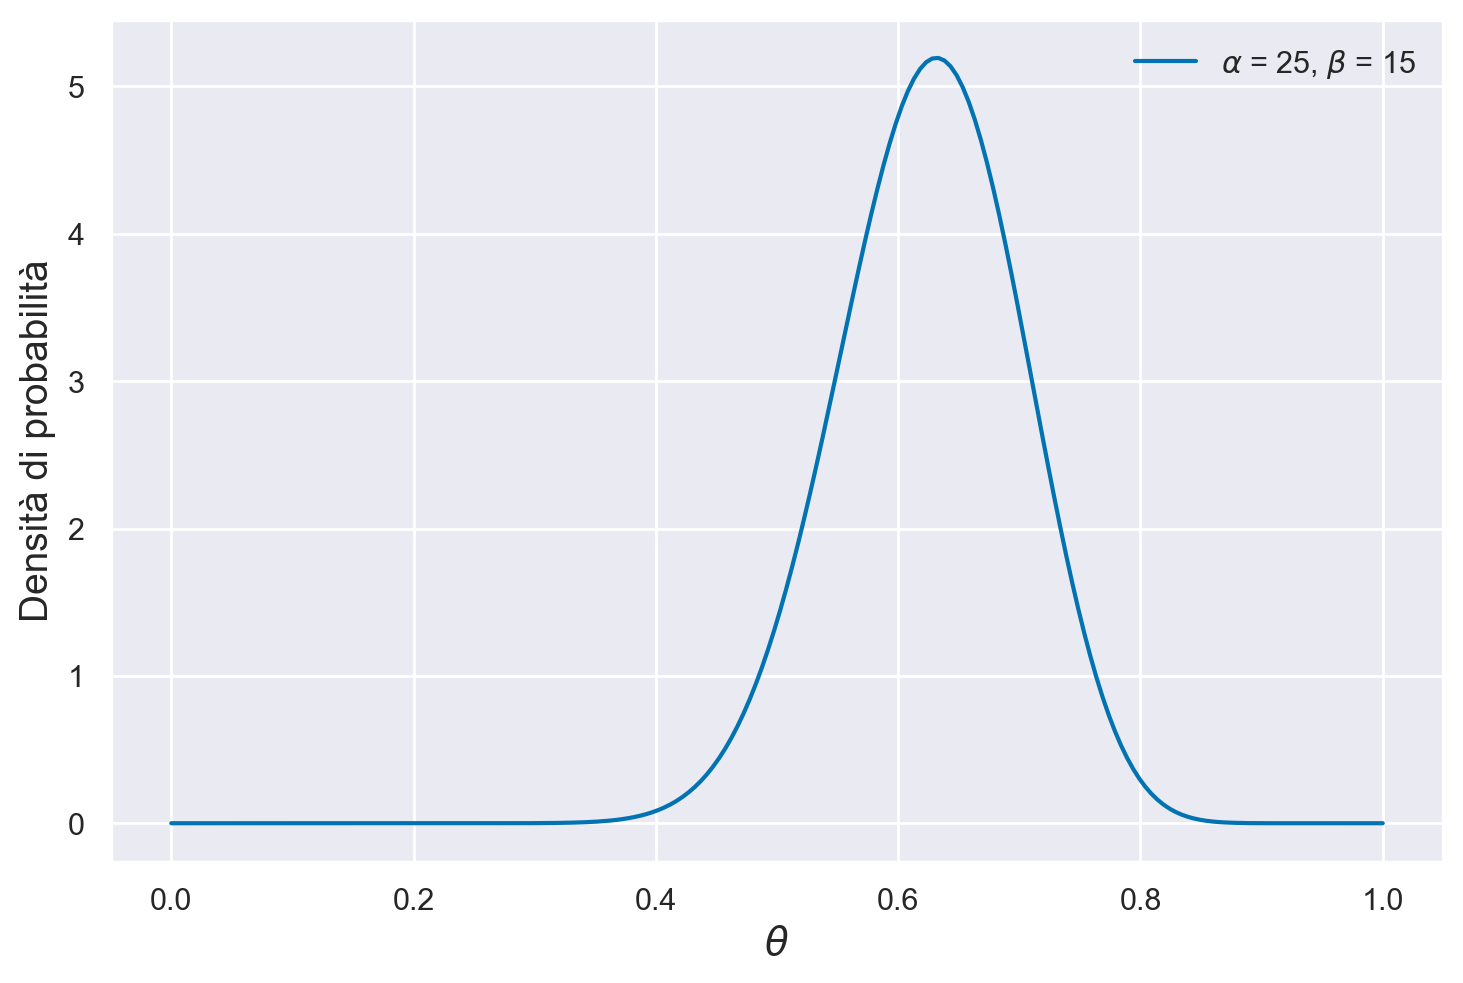

In [5]:
theta = np.linspace(0, 1, 200)
alpha = 25
beta = 15
pdf = stats.beta.pdf(theta, alpha, beta)
plt.plot(theta, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(alpha, beta))
plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel("Densità di probabilità", fontsize=14)
plt.legend(loc=1)
plt.show()

Vediamo ora come ottenere delle stime puntuali da tale distribuzione a posteriori. 

per il presente esempio, la media della distribuzione a posteriori di $\theta$ è

$$
\mathbb{E}(\pi \mid y = 17) = \frac{\alpha}{\alpha + \beta} = \frac{25}{25+15} = 0.625.
$$

Una stima del massimo della probabilità a posteriori, o brevemente massimo a posteriori, MAP (da *maximum a posteriori probability*), è la moda della distribuzione a posteriori. Nel caso presente, abbiamo

$$
Mo(\pi \mid y = 17) = \frac{\alpha-1}{\alpha + \beta-2} = \frac{25-1}{25+15-2} = 0.6316.
$$

La mediana si ottiene con la funzione `beta.ppf()`:

In [6]:
stats.beta.ppf(0.5, alpha, beta)

0.6271031100419254

L'intervallo di credibilità simmetrico al 94% è dato dalla chiamata a `beta.ppf()`.

In [7]:
[stats.beta.ppf(0.03, alpha, beta), stats.beta.ppf(0.97, alpha, beta)]

[0.4781025861696672, 0.7612890799836668]

Il calcolo precedente evidenzia l'interpretazione intuitiva dell'intervallo di credibilità. Tale intervallo, infatti, può essere interpretato nel modo seguente: possiamo attribuire una certezza soggettiva del 94% all'evento che $\theta$ assuma un valore compreso tra 0.478 e 0.761. Il valore di 0.94 corrisponde infatti all'area sottesa dalla distribuzione a posteriori nell'intervallo $$0.478, 0.761$$.

$$
P(\theta \in (0.478, 0.761) \mid Y = 17) = \int_{0.478}^{0.761} f(\theta \mid y=17) d\theta = 0.94.
$$

In [8]:
betacdf = stats.beta(alpha, beta).cdf
betacdf(0.7612890799836668) - betacdf(0.4781025861696672)

0.9400000000000001

Possiamo costruire vari intervalli di credibilità simmetrici. Ad esempio, l'intervallo di credibilità compreso tra il 25-esimo e il 75-esimo percentile:

In [9]:
[stats.beta.ppf(0.25, alpha, beta), stats.beta.ppf(0.75, alpha, beta)]

[0.5743877928498646, 0.6778673380880944]

In questo secondo caso, possiamo affermare con una certezza soggettiva del 50% che la probabilità di depressione grave tra i pazienti clinici si situa tra 0.57 e 0.68.

Non esiste un livello "giusto" di credibilità soggettiva. I ricercatori adottano livelli differenti, come il 50%, l'80% o il 94%, a seconda del contesto dell'analisi statistica. Ogni intervallo offre una prospettiva unica sulla nostra comprensione della distribuzione a posteriori del parametro d'interesse.

Non sempre è appropriato presentare un intervallo di credibilità con le stesse code. Quando la distribuzione a posteriori è marcatamente asimmetrica, risulta più adeguato fornire l'intervallo di credibilità più stretto (o Intervallo di Massima Densità Posteriore, HPD). L'intervallo HPD è più facilmente calcolabile quando si approssima la distribuzione a posteriori con il metodo MCMC.

Passiamo ora alla verifica di ipotesi bayesiana. Supponiamo che la nostra ipotesi sia: $\theta >$ 0.5. La credibilità soggettiva dell'evento $\theta > 0.5$ può essere ottenuta calcolando il seguente integrale:

$$
f(\theta > 0.5 \; \mid \; y = 17) = \int_{0.5}^{1}f(\theta \mid y=17)d\theta \;,
$$

dove $f(\cdot)$ è la distribuzione Beta(25, 15). 

È facile trovare questo valore con Python.

In [6]:
# Parametri della distribuzione Beta
alpha = 25
beta = 15

# Calcoliamo la probabilità P(theta < 0.5) utilizzando la funzione cdf 
probability = stats.beta.cdf(0.5, alpha, beta)

# La probabilità P(theta < 0.5) è data da 1 - P(theta > 0.5)
probability_less_than_0_5 = 1 - probability

print(f"La probabilità P(theta < 0.5) per una Beta(25, 15) è: {probability_less_than_0_5:.4f}")

La probabilità P(theta < 0.5) per una Beta(25, 15) è: 0.9459


## Commenti e considerazioni finali 

In conclusione, la distribuzione a posteriori rappresenta la nostra conoscenza aggiornata sui parametri sconosciuti. L'impiego delle statistiche descrittive e l'analisi degli intervalli di credibilità contribuiscono a tracciare un quadro completo della distribuzione a posteriori e delle nostre inferenze riguardo al parametro di interesse.

Le stime puntuali, ottenute attraverso statistiche descrittive come media, mediana o moda a posteriori, offrono una singola valutazione numerica del parametro ignoto. Gli intervalli di credibilità forniscono un intervallo di valori all'interno del quale si ritiene, con un certo grado di probabilità soggettiva, che il parametro incognito possa rientrare. Questi intervalli quantificano l'incertezza associata al parametro e consentono di esprimere il livello di fiducia soggettiva riguardo ai possibili valori del parametro dopo l'analisi dei dati. Abbiamo inoltre esaminato il concetto di test di ipotesi bayesiano, il quale può essere condotto agevolmente calcolando l'area appropriata sotto la distribuzione a posteriori, in accordo con l'ipotesi in questione.

## Watermark

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Tue Jan 23 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

matplotlib: 3.8.2
arviz     : 0.17.0
numpy     : 1.26.2
seaborn   : 0.13.0
scipy     : 1.11.4

Watermark: 2.4.3

